# Trabajo Unidad 2: Técnicas avanzadas de programación

- Autor: Felipe E. Espinoza Vidal
- Afiliación: Universidad Tecnológica Metropolitana
- Repositorio Github: https://github.com/fespinozav/TAP

El objetivo de este trabajo es aplicar los conceptos aprendidos durante la Segunda Unidad. Cada
estudiante deberá realizar el trabajo de manera individual.
El trabajo consta de tres partes:

## 1.1.1 Pipeline en Nextflow

Programar un pipeline utilizando el gestor de workflows Nextflow. El pipeline deberá incluir los
siguientes archivos: main.nf, nextflow.config, y los scripts necesarios para cada proceso.
nextflow.config: Este archivo de configuración deberá tener como mínimo la declaración de perfiles
local y HPC.


- Descripción del proyecto

A continuación se muestra la estrucutra del proyecto, el cual se obtuve haciendo el comando tree. Se puede observar dentro de esta estructura que dentro de la carpeta data/data es donde se descargan los archivos que posteriormente serán analizados por el proceso.

```
.
├── bin
├── data
│   └── data
│       ├── GCA_000007385.1_ASM738v1_genomic.fna
│       ├── GCA_000008525.1_ASM852v1_genomic.fna
│       ├── GCA_000013525.1_ASM1352v1_genomic.fna
│       ├── GCA_000014305.1_ASM1430v1_genomic.fna
│       └── GCA_000014325.1_ASM1432v1_genomic.fna
├── Informe.ipynb
├── main.nf
├── nextflow.config
├── parser.py
├── README.md
└── scripts
    ├── check_pyspark.sh
    ├── describe_fasta.sh
    ├── download_data.sh
    └── regex_pyspark.py

5 directories, 14 files

```

- Diagrama de flujo

![flowchart.png](attachment:flowchart.png)

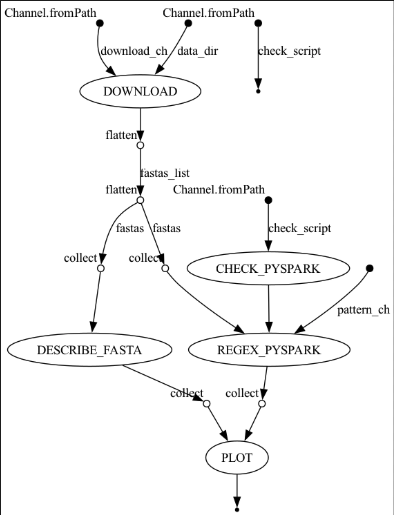

- Descripción del hardware:

Este workflow fue desarrollado en un Apple Macbook Pro M2 Pro (ARM) de 16 GB de Ram y el hardware usado donde se encuentran los archivos fueron disponibilizados por el profesor y se e cuentran en el servidor faraday de la Universidad Tecnológica Metropolitana. 

Se puede ver mas información sobre el cluster faraday en el siguiente link: https://investigacion.utem.cl/red-de-laboratorios/cluster-faraday-utem/tutoriales/

### Descripción de las versiones de los softwares, lenguajes y librerias usadas:

- Nextflow versión 24.06.06
- Python 3.12.5
- Pyspark 4.0.0
- Java OpenJDK11
- matplotlib 3.10.3





### Sistema operativo en que se desarrollo.

- MmacOs Sequoia Version 15.5

### Instrucciones de uso.

1.	Clonar este repositorio y entrar al directorio:

git clone https://github.com/fespinozav/TAP.git
cd TAP

2.	Preparar el entorno Python (recomendado en un virtualenv o Conda):
python3 -m venv .venv
source .venv/bin/activate
pip install pyspark pandas matplotlib

3.	Verifica la instalación de Nextflow y Java:
nextflow -v
java -version

### Configuración
-	params.data_dir (en main.nf): directorio donde se guardan los FASTA descargados (por defecto data/).
-	params.kmer: la cadena k-mer a buscar (por defecto "GC").
-	params.results: carpeta de salida para resúmenes y gráficos (por defecto results/).

### Ejecución

nextflow run main.nf -profile local

### Resultados
```
results/
├── summary.txt             # Resumen de cada FASTA (nº secuencias, longitud, %GC)
├── regex_summary.txt       # Conteo de k-mer por archivo
├── pyspark_check.log       # Salida de la verificación de PySpark
└── plots/
    ├── num_sequences.png   # Gráfico de nº de secuencias
    ├── total_length.png    # Gráfico de longitud total
    ├── gc_content.png      # Gráfico de contenido GC
    └── regex_counts.png    # Gráfico de conteo de k-mer
```

### Importante ⚠️

 Notas finales
	•	Asegúrarse de tener acceso SSH al clúster para que download_data.sh funcione (te pedirá passphrase).
	•	Si cambias scripts o parámetros, usa la opción -resume para reutilizar resultados cacheados.
	•	Para problemas con PySpark, revisa results/pyspark_check.log.

## Resultados generados



### Archivo regex_summary.txt:
-	file_idx
El nombre del archivo FASTA que se procesó (el ensamblaje completo de cada genoma).
-	match_count
El número de veces que el k-mer (en tu caso "GC") apareció en la secuencia de ese FASTA.

| file_idx                                  | match_count   |
|-------------------------------------------|---------------|
| GCA_000007385.1_ASM738v1_genomic.fna      | 653919        |
| GCA_000008525.1_ASM852v1_genomic.fna      | 98439         |
| GCA_000013525.1_ASM1352v1_genomic.fna     | 82862         |
| GCA_000014305.1_ASM1430v1_genomic.fna     | 94517         |
| GCA_000014325.1_ASM1432v1_genomic.fna.    | 94515         |



### Resultado summary.txt

- file : Nombre del archivo FASTA analizado. Cada uno contiene el ensamblaje completo de un genoma.
- num_seq : Número de secuencias o contigs en el archivo. Aquí vale 1 para todos, porque cada FASTA es un único contig o cromosoma completo.
- total_len : Longitud total en pares de bases (bp). Equivale a la suma de todas las longitudes de secuencia en el fichero FASTA. Por ejemplo, 4941439 significa que el ensamblaje mide aproximadamente 4.94 Mb.
- gc_percent : Porcentaje de nucleótidos G + C sobre el total de pares de bases. Por ejemplo, el primer genoma tiene un 63.69 % de GC, mientras que los otros rondan el 38–41 %.




| file	                                | num_seq	| total_len	| gc_percent |
| --------------------------------------|-----------|-----------|------------|
| GCA_000007385.1_ASM738v1_genomic.fna	| 1	        |  4941439	| 63.69     
| GCA_000008525.1_ASM852v1_genomic.fna	| 1	        |  1667867	| 38.87
| GCA_000013525.1_ASM1352v1_genomic.fna	| 1	        |  1860355	| 38.73
| GCA_000014305.1_ASM1430v1_genomic.fna	| 1	        |  2096309	| 41.11
| GCA_000014325.1_ASM1432v1_genomic.fna	| 1	        |  2095698	| 41.11

### Graficos (plots)

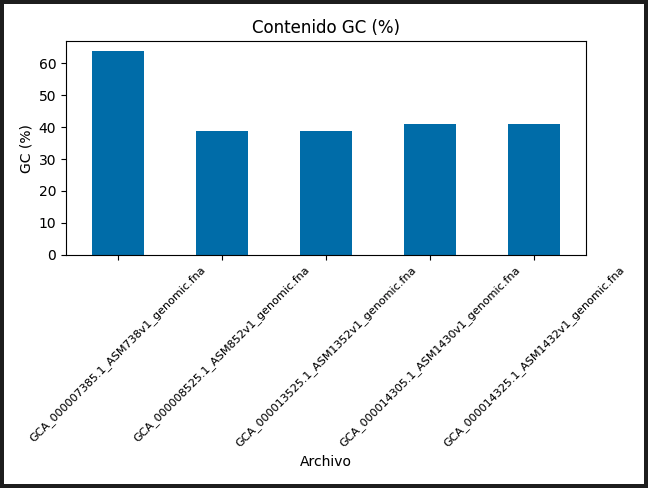

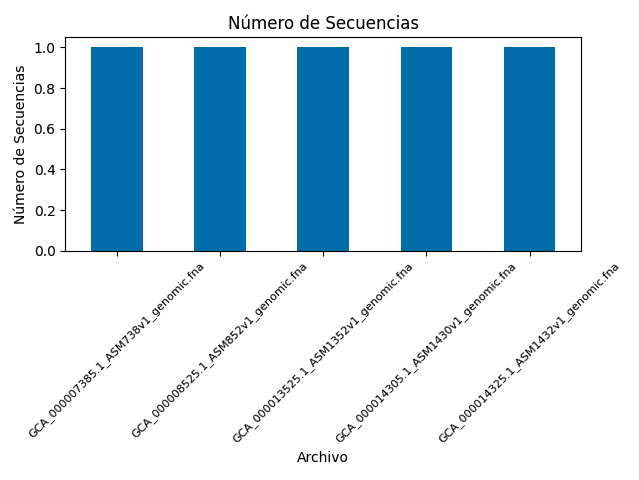

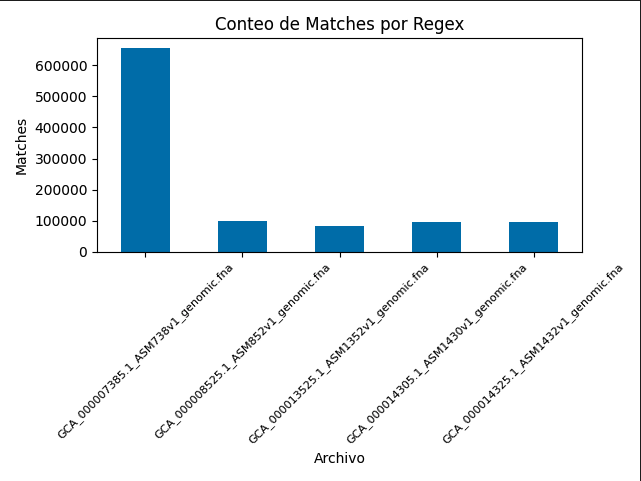

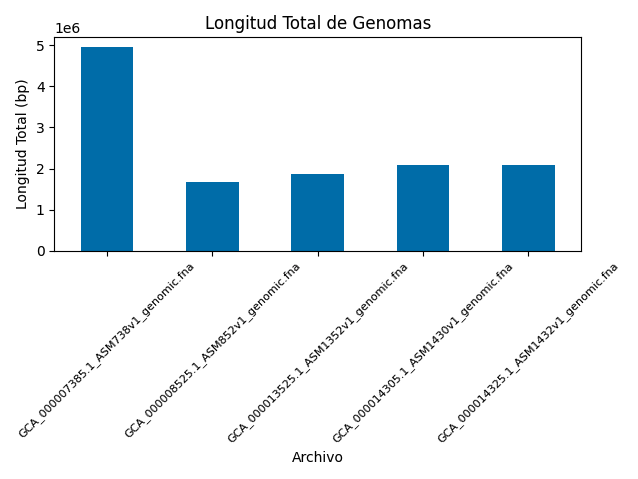

## Análisis de los resultados 

### gc_content.png

Este gráfico de Contenido GC (%) resume la proporción de nucleótidos G + C en cada uno de tus cinco ensamblajes:

1.	GCA_000007385.1_ASM738v1 (~63.7 % GC)
	-	Se sitúa muy por encima de los demás, con un marcado sesgo hacia GC.
2.	Los otros cuatro ensambles (~38.4 %–41.6 % GC)
	-	GCA_000013525.1_ASM1352v1 (~38.4 %) es el más rico en AT, con el GC más bajo.
	-	GCA_000008525.1_ASM852v1 (~40.9 %) y GCA_000014305.1_ASM1430v1 & GCA_000014325.1_ASM1432v1 (~41.6 %) caen todos dentro de un rango estrecho (39–42 %).


### num_sequences.png

El gráfico de Número de Secuencias te está confirmando que cada uno de los cinco archivos FASTA contiene exactamente 1 secuencia.

### regex_counts.png

Este gráfico muestra el conteo de nucleótidos “GC” (k-mer de tamaño 2) en cada uno de los ensamblajes.

### total_lenght.png

Este gráfico muestra la longitud total (en pares de bases) de cada uno de tus cinco genomas.

-	El primer genoma (ASM738v1) duplica en tamaño al siguiente más grande y es casi 3× mayor que los más pequeños.
-	Esto sugiere que pertenece a una especie o cepa con un genoma significativamente más extenso.

